In [1]:
import requests

In [2]:
NAVER_STOCK_URL = "https://m.stock.naver.com/domestic/index/KOSPI/total"

In [3]:
from bs4 import BeautifulSoup

response = requests.get(NAVER_STOCK_URL)
page = response.content

In [4]:
soup = BeautifulSoup(page, 'html.parser')
soup

<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,minimum-scale=1,user-scalable=no" name="viewport"/>
<meta content="코스피 - 네이버 증권" property="og:title">
<meta content="article" property="og:type"/>
<meta content="https://m.stock.naver.com/domestic/index/KOSPI/total" property="og:url"/>
<meta content="관심종목의 실시간 주가를 가장 빠르게 확인하는 곳" property="og:description"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="네이버증권" property="og:article:author"/>
<meta content="https://m.stock.naver.com" property="og:article:author:url"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:article:thumbnailUrl"/>
<title>네이버 증권</title>
<link href="https://ssl.pstatic.net/imgstock/favi/favicon.ico" rel="shortcut icon"/>
<meta content="네이버 증권" name="apple-mobile-web-app-title"/>
<link href="https://ssl.pstatic.net/imgs

# 코스피, 코스닥, 달러 환율 api 크롤링
- 올해 2023년 1월 1일 부터 오늘까지 코스피 , 코스닥 , 달러환율 하나의 캔버스에 시각화

In [6]:
# 실시간 코스피 지수 가져오기
REALTIME_KOSPI_API = "https://polling.finance.naver.com/api/realtime/domestic/index/KOSPI"
response = requests.get(REALTIME_KOSPI_API)
response.status_code

200

In [7]:
# 응답을 어떻게 받았을까? - content-type 확인하기
data = response.json()
data

{'pollingInterval': 7000,
 'datas': [{'itemCode': 'KOSPI',
   'stockName': '코스피',
   'stockExchangeType': {'code': 'KS',
    'zoneId': 'Asia/Seoul',
    'nationType': 'KOR',
    'delayTime': 0,
    'startTime': '0900',
    'endTime': '1530',
    'closePriceSendTime': '1630',
    'nameKor': '코스피',
    'nameEng': 'KOSPI',
    'nationCode': 'KOR',
    'nationName': '대한민국',
    'name': 'KOSPI'},
   'closePrice': '2,501.53',
   'compareToPreviousClosePrice': '5.72',
   'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
   'fluctuationsRatio': '0.23',
   'openPrice': '2,511.79',
   'highPrice': '2,517.13',
   'lowPrice': '2,489.58',
   'accumulatedTradingVolume': '777,535천주',
   'accumulatedTradingValue': '14,024,831백만',
   'marketStatus': 'CLOSE',
   'localTradedAt': '2023-04-28T18:59:00+09:00',
   'symbolCode': 'KOSPI'}],
 'time': '20230501094044'}

In [8]:
data['datas'][0]['closePrice']

'2,501.53'

In [9]:
# 200일치 코스피 종가를 데이터 프레임으로 정리
KOSPI_API = "https://api.stock.naver.com/chart/domestic/index/KOSPI?periodType=dayCandle"
response = requests.get(KOSPI_API)
response.status_code

200

In [10]:
datas = response.json()
price_info_datas = datas['priceInfos']
price_info_datas[:2]

[{'localDate': '20221122',
  'closePrice': 2405.27,
  'openPrice': 2405.96,
  'highPrice': 2426.4,
  'lowPrice': 2401.5,
  'accumulatedTradingVolume': 539169,
  'foreignRetentionRate': 0.0},
 {'localDate': '20221123',
  'closePrice': 2418.01,
  'openPrice': 2424.36,
  'highPrice': 2427.28,
  'lowPrice': 2407.58,
  'accumulatedTradingVolume': 474789,
  'foreignRetentionRate': 0.0}]

In [11]:
import pandas as pd

kospi_df = pd.DataFrame(price_info_datas)
kospi_df.tail()

,localDate,closePrice,openPrice,highPrice,lowPrice,accumulatedTradingVolume,foreignRetentionRate
105,20230424,2523.50,2538.36,2541.89,2518.73,927191,0.0
106,20230425,2489.02,2531.35,2531.35,2472.33,886422,0.0
107,20230426,2484.83,2489.49,2498.56,2481.38,1089216,0.0
108,20230427,2495.81,2484.31,2499.01,2465.83,733500,0.0
109,20230428,2501.53,2511.79,2517.13,2489.58,777535,0.0


In [12]:
# 코스닥 데이터 가져오기
url = "https://api.stock.naver.com/chart/domestic/index/KOSDAQ?periodType=dayCandle"

res = requests.get(url)
datas = res.json()["priceInfos"]
datas[:2]

[{'localDate': '20221122',
  'closePrice': 712.26,
  'openPrice': 716.24,
  'highPrice': 719.8,
  'lowPrice': 711.92,
  'accumulatedTradingVolume': 895809,
  'foreignRetentionRate': 0.0},
 {'localDate': '20221123',
  'closePrice': 725.59,
  'openPrice': 718.29,
  'highPrice': 725.64,
  'lowPrice': 718.29,
  'accumulatedTradingVolume': 830056,
  'foreignRetentionRate': 0.0}]

In [13]:
kosdaq_df = pd.DataFrame(datas)
kosdaq_df.tail()

,localDate,closePrice,openPrice,highPrice,lowPrice,accumulatedTradingVolume,foreignRetentionRate
105,20230424,855.23,867.38,870.08,852.48,1308673,0.0
106,20230425,838.71,857.54,858.91,828.25,1540092,0.0
107,20230426,830.44,835.94,846.42,829.19,1260645,0.0
108,20230427,850.21,831.89,850.88,823.19,1461893,0.0
109,20230428,842.83,860.11,860.11,839.67,1157792,0.0


In [14]:
# USD 크롤링
url = "https://api.stock.naver.com/chart/domestic/marketindex/FX_USDKRW?periodType=month&range=6"
res = requests.get(url)
datas = res.json()["priceInfos"]
usd_df = pd.DataFrame(datas)
usd_df.tail()

,localDate,closePrice,openPrice,highPrice,lowPrice
123,20230424,1335.0,0.0,1335.0,1335.0
124,20230425,1342.0,0.0,1342.0,1342.0
125,20230426,1338.0,0.0,1338.0,1338.0
126,20230427,1342.0,0.0,1342.0,1342.0
127,20230428,1341.0,0.0,1341.0,1341.0


In [15]:
kospi_df_0329 = kospi_df[kospi_df["localDate"] >= "20230101"]
kosdaq_df_0329 = kosdaq_df[kosdaq_df["localDate"] >= "20230101"]
usd_df_0329 = usd_df[usd_df["localDate"] >= "20230101"]

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # matplotlib을 활용해도 seaborn 스타일로 사용이 된다.

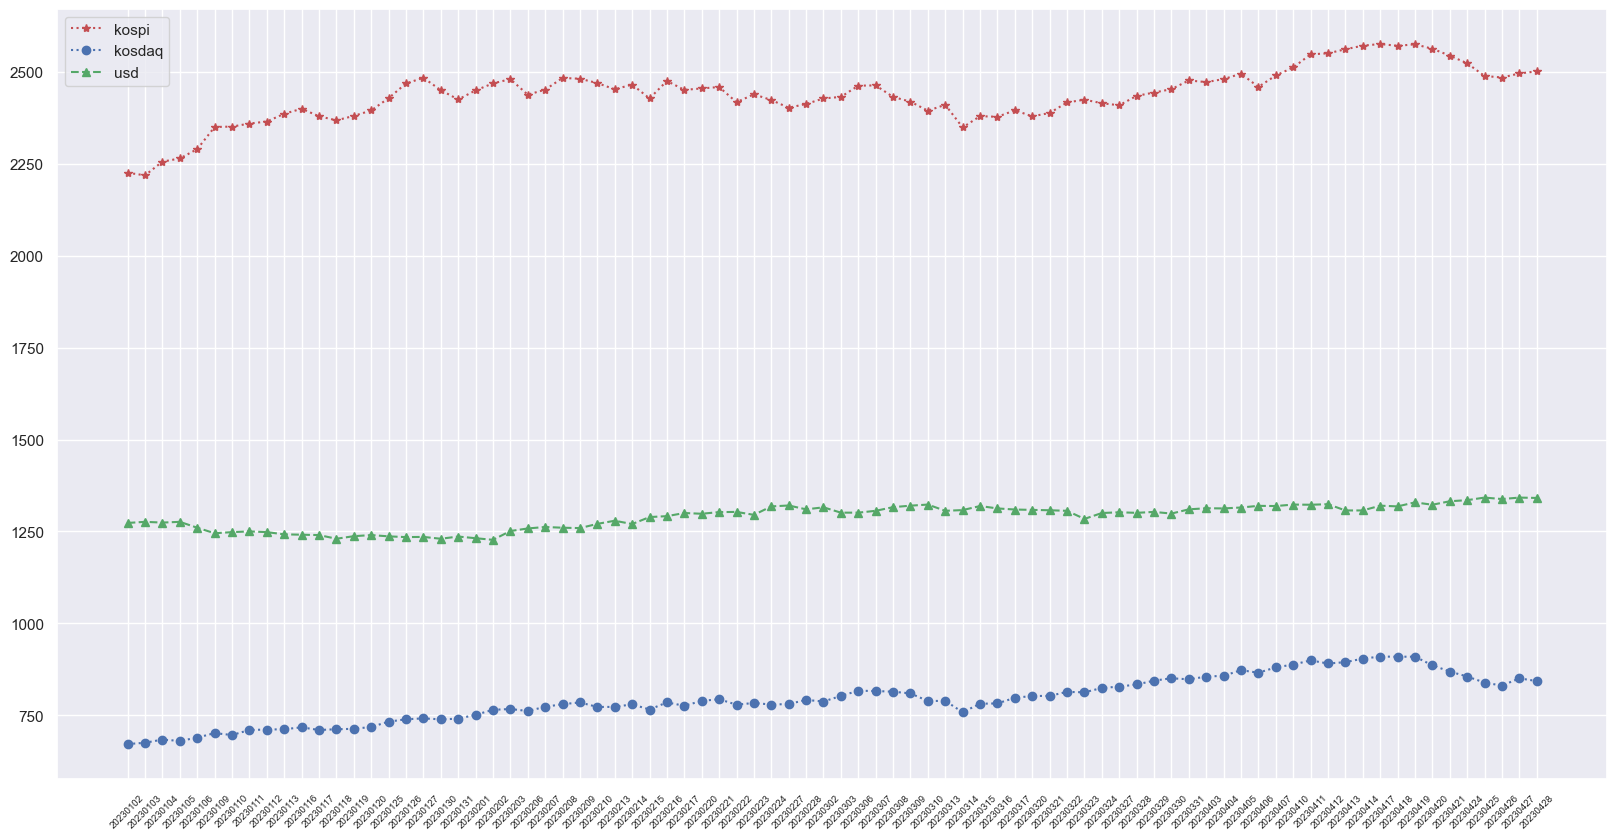

In [17]:
plt.figure(figsize=(20, 10))

plt.plot(kospi_df_0329["localDate"], kospi_df_0329["closePrice"], "r*:", label="kospi")
plt.plot(kosdaq_df_0329["localDate"], kosdaq_df_0329["closePrice"], "bo:", label="kosdaq")
plt.plot(usd_df_0329["localDate"], usd_df_0329["closePrice"], "g^--", label="usd")
plt.xticks(rotation=45, fontsize=7)
plt.legend()
plt.show()

In [18]:
# MinMax Scaling을 해주는 함수 사용하기
from sklearn.preprocessing import minmax_scale

minmax_scale(kospi_df_0329["closePrice"])

array([0.01956723, 0.        , 0.10441452, 0.1286846 , 0.19956331,
       0.36813817, 0.37127341, 0.39428379, 0.40987599, 0.46863365,
       0.50718025, 0.44987823, 0.41888979, 0.45253758, 0.49430339,
       0.58754864, 0.69974526, 0.74277076, 0.64885368, 0.57777902,
       0.64697814, 0.70038911, 0.73263724, 0.61447807, 0.65232483,
       0.74170702, 0.73577247, 0.70276852, 0.65509616, 0.69131932,
       0.5856731 , 0.7188646 , 0.65092517, 0.6618705 , 0.67261988,
       0.55706408, 0.61699745, 0.57366403, 0.51496235, 0.54354338,
       0.58553313, 0.59734625, 0.68286538, 0.68490888, 0.59689836,
       0.56101111, 0.49242785, 0.53724491, 0.36472301, 0.450802  ,
       0.44573524, 0.4955071 , 0.44934636, 0.47496011, 0.55504857,
       0.57609943, 0.54944993, 0.53338185, 0.60538029, 0.63051815,
       0.65638384, 0.72272765, 0.71007474, 0.73294516, 0.77409512,
       0.6733757 , 0.7606584 , 0.8213196 , 0.92147916, 0.92926126,
       0.96010973, 0.98762702, 1.        , 0.98650729, 0.99767

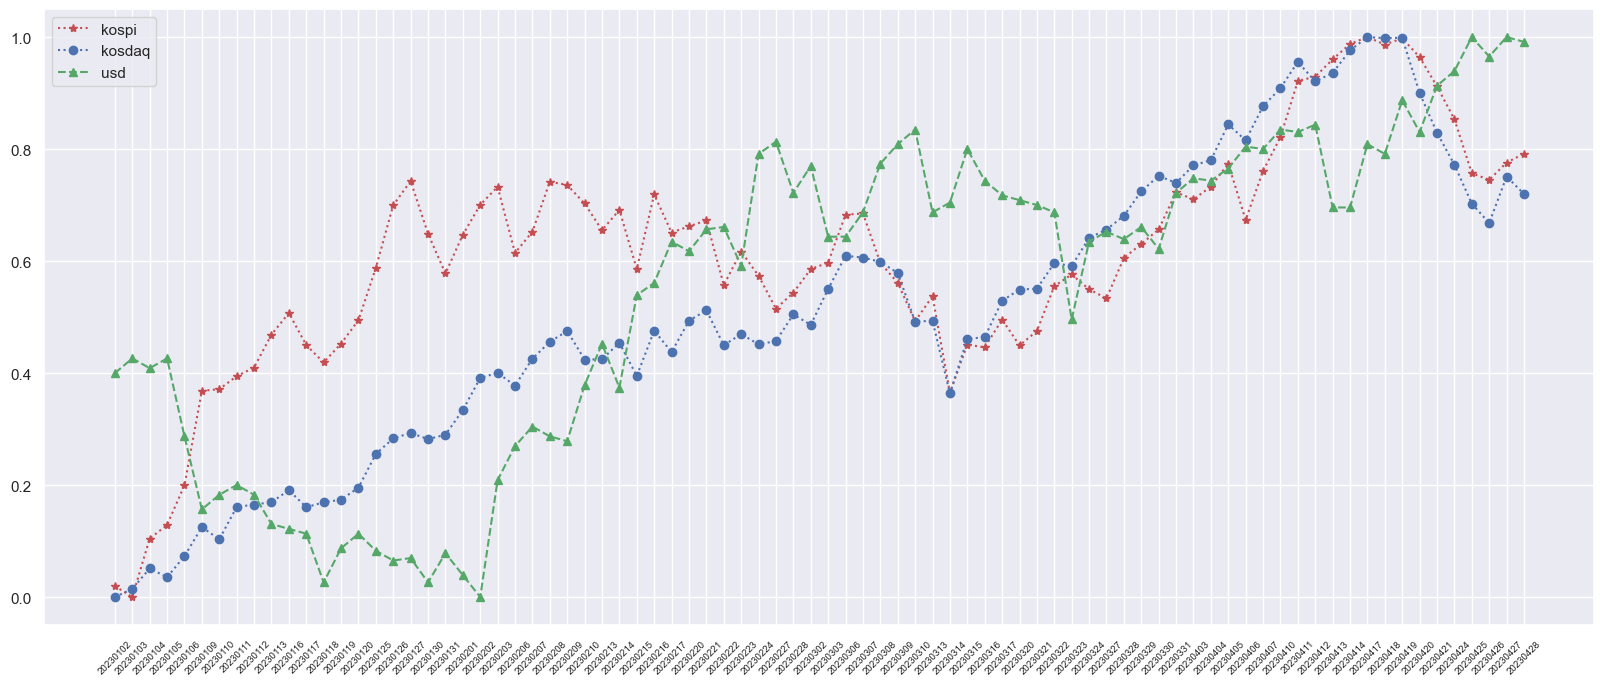

In [19]:
plt.figure(figsize=(20, 8))

plt.plot(kospi_df_0329["localDate"], minmax_scale(kospi_df_0329["closePrice"]), "r*:", label="kospi")
plt.plot(kosdaq_df_0329["localDate"],minmax_scale(kosdaq_df_0329["closePrice"]), "bo:", label="kosdaq")
plt.plot(usd_df_0329["localDate"],   minmax_scale(usd_df_0329["closePrice"]), "g^--", label="usd")
plt.xticks(rotation=45, fontsize=7)
plt.legend()
plt.show()

In [20]:
# 코스피, 코스닥, 미 환율 상관관계 확인
import numpy as np

# 코스피 : 코스닥 상관관계
np.corrcoef(kospi_df_0329["closePrice"], kosdaq_df_0329["closePrice"])[0, 1]

0.8295257355885358

In [21]:
# 코스피 : 미 달러 환율 상관관계
np.corrcoef(kospi_df_0329["closePrice"], usd_df_0329["closePrice"])[0, 1]

0.3961148802357064